In [4]:
%matplotlib inline

# 01-02_9

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#read in csv, plot both the close and adjusted close prices
"""
def test_run():
    df = pd.read_csv("AAPL.csv")
    df[['Close', 'Adj Close']].plot()
    plt.show()
"""

#read in csv, print head, tail, rows 10-20, max close value, and mean of volume
"""
def test_run():
    df = pd.read_csv("AAPL.csv")
    print(df.head())
    print(df.tail())
    print(df[10:21])
    print(df['Close'].max())
    print(df['Volume'].mean())
"""

#declare empty df with indexes of dates
"""
def test_run():
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date,end_date)
    df1 = pd.DataFrame(index=dates)
    print(df1)
"""

#join dfs
def test_run():
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date,end_date)

    #declare empty df with index = dates
    df1 = pd.DataFrame(index=dates)

    #read SPY data in
    dfSPY = pd.read_csv("SPY.csv", index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
    dfSPY = dfSPY.rename(columns={'Adj Close':'SPY'})

    #join the empty df and SPY df using DataFrame.join() - inner to only keep records that appear in both
    df1 = df1.join(dfSPY, how = 'inner')

    symbols = ['GOOG', 'IBM', 'GLD']
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col='Date', parse_dates=True, usecols = ['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df1 = df1.join(df_temp)


    print(df1)

if __name__ == "__main__":
    test_run()
        

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


# 01-02_14

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#read in csv, plot both the close and adjusted close prices
"""
def test_run():
    df = pd.read_csv("AAPL.csv")
    df[['Close', 'Adj Close']].plot()
    plt.show()
"""

#read in csv, print head, tail, rows 10-20, max close value, and mean of volume
"""
def test_run():
    df = pd.read_csv("AAPL.csv")
    print(df.head())
    print(df.tail())
    print(df[10:21])
    print(df['Close'].max())
    print(df['Volume'].mean())
"""

#declare empty df with indexes of dates
"""
def test_run():
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date,end_date)
    df1 = pd.DataFrame(index=dates)
    print(df1)
"""

#join dfs
def test_run():
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date,end_date)

    #declare empty df with index = dates
    df1 = pd.DataFrame(index=dates)

    #read SPY data in
    dfSPY = pd.read_csv("SPY.csv", index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
    dfSPY = dfSPY.rename(columns={'Adj Close':'SPY'})

    #join the empty df and SPY df using DataFrame.join() - inner to only keep records that appear in both
    df1 = df1.join(dfSPY, how = 'inner')

    symbols = ['GOOG', 'IBM', 'GLD']
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col='Date', parse_dates=True, usecols = ['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df1 = df1.join(df_temp)


    print(df1)

if __name__ == "__main__":
    test_run()
        

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


# 01-02_15

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col='Date', parse_dates=True, usecols = ['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df):
    df.plot()
    plt.show()

def test_run():
    dates = pd.date_range('2010-01-01', '2010-12-31')
    symbols = ['GOOG', 'IBM', 'GLD']
    df = get_data(symbols, dates)
    #print(df)
    #print(df.loc['2010-01-01':'2010-01-31']) #slice rows between 2 dates - note df.ix is depreciated use df.loc
    #slice by column (symbols)
    #print(df['GOOG']) #print only one col
    #print(df[['IBM', 'GLD']]) #print multiple cols
    print(df.loc['2010-01-01':'2010-01-31', ['SPY', 'IBM']]) #print SPY and IBM for only jan 2010
if __name__ == "__main__":
    test_run()
        

               SPY     IBM
2010-01-04  108.27  126.24
2010-01-05  108.56  124.71
2010-01-06  108.64  123.90
2010-01-07  109.10  123.47
2010-01-08  109.46  124.71
2010-01-11  109.61  123.41
2010-01-12  108.59  124.39
2010-01-13  109.51  124.12
2010-01-14  109.80  126.10
2010-01-15  108.57  125.60
2010-01-19  109.93  127.85
2010-01-20  108.81  124.14
2010-01-21  106.72  122.95
2010-01-22  104.34  119.61
2010-01-25  104.87  120.20
2010-01-26  104.43  119.85
2010-01-27  104.93  120.40
2010-01-28  103.73  117.94
2010-01-29  102.60  116.65


# 01-02_17 and 19

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


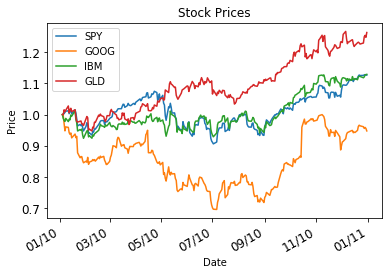

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col='Date', parse_dates=True, usecols = ['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    #return (df -df.mean()) / (df.max()- df.min())
    return df / df.ix[0,:]

def plot_data(df):
    ax = df.plot(title="Stock Prices", fontsize=12)
    ax.set(xlabel="Date", ylabel = "Price")
    myFmt = mdates.DateFormatter("%m/%y")
    ax.xaxis.set_major_formatter(myFmt)
    plt.show()

def test_run():
    dates = pd.date_range('2010-01-01', '2010-12-31')
    symbols = ['GOOG', 'IBM', 'GLD']
    df = get_data(symbols, dates)
    df = normalize_data(df)
    #print(df)
    #print(df.loc['2010-01-01':'2010-01-31']) #slice rows between 2 dates - note df.ix is depreciated use df.loc
    #slice by column (symbols)
    #print(df['GOOG']) #print only one col
    #print(df[['IBM', 'GLD']]) #print multiple cols
    #print(df.loc['2010-01-01':'2010-01-31', ['SPY', 'IBM']]) #print SPY and IBM for only jan 2010
    #df = df.loc['2010-03-01':'2010-04-01', ['SPY', 'IBM']] #select SPY and IBM for only march 2010 and then plot
    plot_data(df)
    
    
if __name__ == "__main__":
    test_run()
        